# 3. Example: pyqg package models

DataAssimBench can also interface with pyqg, an external package for quasigeostrophic models. pyqg stands for Python Quasigeostrophic model:

https://pyqg.readthedocs.io/en/latest/


In this example, we'll run through generating data using a couple types of models available in pyqg.


### Part I: Installing pyqg and imports

Since pyqg is an external package, we'll need to install it before we can use it via DataAssimBench.

Installing pyqg is easy. If you're using conda (recommended), just run the following in your terminal:

```bash
conda install -c conda-forge pyqg
```

For more info and alternative methods of installing pyqg, see: https://pyqg.readthedocs.io/en/latest/installation.html

Once you've installed pyqg, let's import dabench and matplotlib.

If pyqg was NOT installed correctly, you'll see the following warning: 

```bash
WARNING:root:Package: pyqg not found!
PyQG will not work without this optional package
To install via conda: conda install -c conda-forge pyqg
For more information: https://pyqg.readthedocs.io/en/latest/installation.html
```

If you don't see this warning, you're ready to go! If you do see this warning, try installing pyqg again, restart the kernel of this notebook, and try running the import again.

In [1]:
import matplotlib.pyplot as plt
from dabench import data

<frozen importlib._bootstrap>:241: UserWarning: No pyfftw detected. Using numpy.fft


### Part II: Two-Layer QG Model 

First, we'll recreate [this example](https://pyqg.readthedocs.io/en/latest/examples/two-layer.html) from the pyqg docs, but without having to interface with pyqg directly. We'll create the model object, generate the data, and view the results just like we would any other dabench data generator.

NOTE: You may get a an error that says something like:

```
RuntimeError: Undefined plan with nthreads. This is a bug
```

This is a bug within the pyFFTW library. For more info and workarounds, see: https://github.com/pyFFTW/pyFFTW/issues/294. But this error can be safely ignored, the model will run fine regardless. 

In [2]:
qg2l_model = data.PyQG()

INFO:  Logger initialized


In [3]:
# Generate model trajectory. This may take a minute or two. 
# Feel free to shorten n_steps if it is taking too long.
qg2l_model.generate(n_steps=4000)

Initial condition not set. Start with random IC.


In [4]:
qg2l_model.x0_gridded.mean()

1.5881867761018131e-22

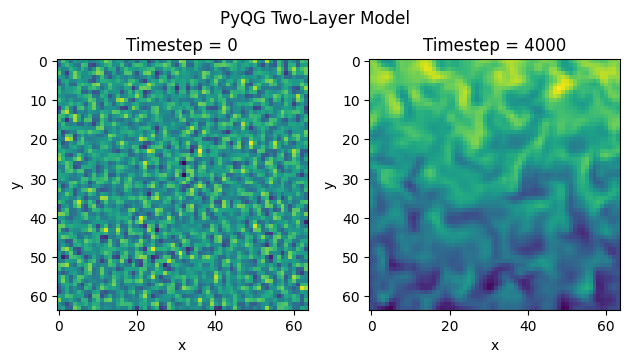

In [7]:
# Now let's plot the initial state vs the final state
fig, ax = plt.subplots(1, 2)
fig.suptitle('PyQG Two-Layer Model')
ax[0].imshow(qg2l_model.values_gridded[0, 1])
ax[0].set_title('Timestep = 0')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(qg2l_model.values_gridded[-1, 1])
ax[1].set_title('Timestep = 4000')
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

(2, 64, 64)


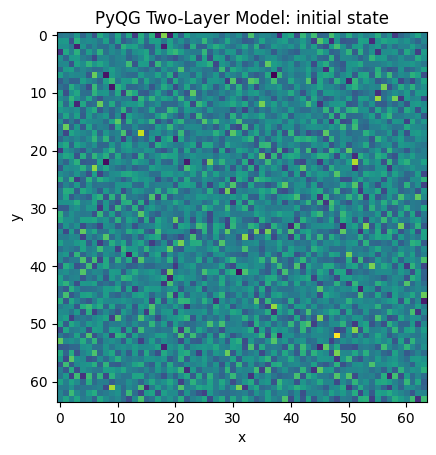

In [8]:
# What does our initial state look like? 
# In this case, we start with a random initial state
print(qg2l_model.x0_gridded.shape) # 2 layers, 64x64
plt.imshow(qg2l_model.x0_gridded[0]) # Visualize first layer
plt.xlabel('x')
plt.ylabel('y')
plt.title('PyQG Two-Layer Model: initial state')
plt.show()


In [9]:
# Our trajectory has 40000 timesteps and a system_dim of 8192
# 8192 = 2 x 64 x 64
print(qg2l_model.values.shape)

(4000, 8192)


In [10]:
# We can access our values in gridded dimension using the values_gridded attribute
print(qg2l_model.values_gridded.shape)

(4000, 2, 64, 64)


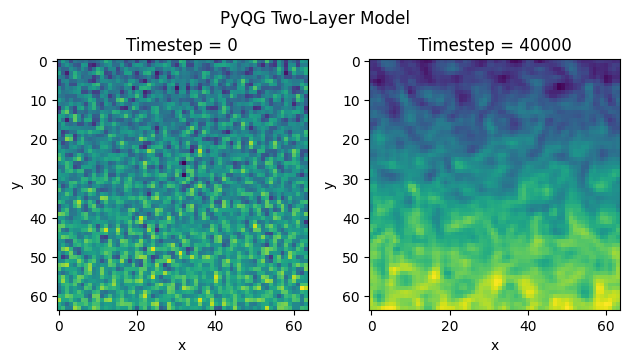

In [11]:
# Now let's plot the initial state vs the final state
fig, ax = plt.subplots(1, 2)
fig.suptitle('PyQG Two-Layer Model')
ax[0].imshow(qg2l_model.values_gridded[0, 0])
ax[0].set_title('Timestep = 0')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(qg2l_model.values_gridded[-1, 0])
ax[1].set_title('Timestep = 40000')
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

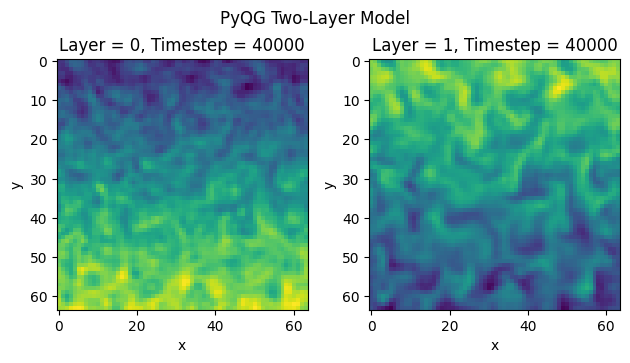

In [12]:
# Now let's plot the bottom layer vs the top at the final timestep
fig, ax = plt.subplots(1, 2)
fig.suptitle('PyQG Two-Layer Model')
ax[0].imshow(qg2l_model.values_gridded[-1, 0])
ax[0].set_title('Layer = 0, Timestep = 40000')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(qg2l_model.values_gridded[-1, 1])
ax[1].set_title('Layer = 1, Timestep = 40000')
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

### Part III: Barotropic Model

Next, we'll recreate [another example](https://pyqg.readthedocs.io/en/latest/examples/two-layer.html) from the pyqg docs. In this case, we're reproducing the results of:
- J. C. Mcwilliams (1984). The emergence of isolated coherent vortices in turbulent flow. Journal of Fluid Mechanics, 146, pp 21-43 doi:10.1017/S0022112084001750



In [13]:
baro_model = data.Barotropic()

INFO:  Logger initialized


In [14]:
# Generate model trajectory
baro_model.generate(n_steps=10000)

Initial condition not set. Start with McWilliams 84 IC condition:
doi:10.1017/S0022112084001750


INFO: Step: 1000, Time: 1.00e+00, KE: 4.96e-01, CFL: 0.107
INFO: Step: 2000, Time: 2.00e+00, KE: 4.94e-01, CFL: 0.097
INFO: Step: 3000, Time: 3.00e+00, KE: 4.93e-01, CFL: 0.108
INFO: Step: 4000, Time: 4.00e+00, KE: 4.93e-01, CFL: 0.102
INFO: Step: 5000, Time: 5.00e+00, KE: 4.93e-01, CFL: 0.100
INFO: Step: 6000, Time: 6.00e+00, KE: 4.92e-01, CFL: 0.109
INFO: Step: 7000, Time: 7.00e+00, KE: 4.92e-01, CFL: 0.098
INFO: Step: 8000, Time: 8.00e+00, KE: 4.92e-01, CFL: 0.096
INFO: Step: 9000, Time: 9.00e+00, KE: 4.92e-01, CFL: 0.104
INFO: Step: 10000, Time: 1.00e+01, KE: 4.92e-01, CFL: 0.115


(1, 256, 256)


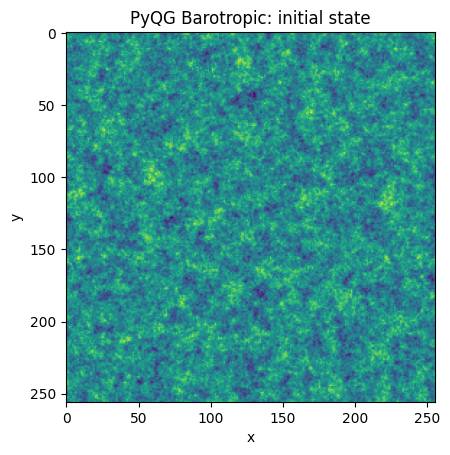

In [15]:
# What does our initial state look like?
print(baro_model.x0_gridded.shape) # 1 layer, 256x256
plt.imshow(baro_model.x0_gridded[0]) # Visualize
plt.xlabel('x')
plt.ylabel('y')
plt.title('PyQG Barotropic: initial state')
plt.show()

In [16]:
# Our trajectory has 10001 timesteps (includes x0) and a system_dim of 65536
# 65536 = 1 x 256 x 256
print(baro_model.values.shape)

(10001, 65536)


In [17]:
# View our values in the gridded dimensions
print(baro_model.values_gridded.shape)

(10001, 1, 256, 256)


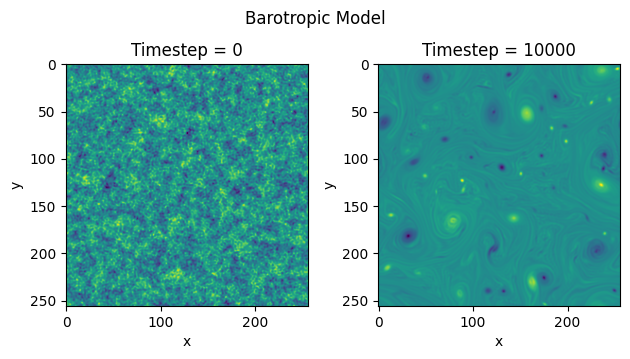

In [18]:
# Now let's plot the initial state vs the final state
fig, ax = plt.subplots(1, 2)
fig.suptitle('Barotropic Model')
ax[0].imshow(baro_model.values_gridded[0, 0])
ax[0].set_title('Timestep = 0')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(baro_model.values_gridded[-1, 0])
ax[1].set_title('Timestep = 10000')
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()